<img src='Departamento.jpg' />

In [187]:
# importing libraries
import pandas as pd
import numpy as np
import folium
import datetime as dt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()
import IPython

IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)
from IPython.core.display import HTML

In [188]:
# Loading data
incidents = pd.read_csv('Police_Department_Incidents.csv', parse_dates=['Date'])
incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-01-05,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,2016-01-01,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


So each row consists of 13 features:
> 1. **IncidntNum**: Incident Number
> 2. **Category**: Category of crime or incident
> 3. **Descript**: Description of the crime or incident
> 4. **DayOfWeek**: The day of week on which the incident occurred
> 5. **Date**: The Date on which the incident occurred
> 6. **Time**: The time of day on which the incident occurred
> 7. **PdDistrict**: The police department district
> 8. **Resolution**: The resolution of the crime in terms whether the perpetrator was arrested or not
> 9. **Address**: The closest address to where the incident took place
> 10. **X**: The longitude value of the crime location 
> 11. **Y**: The latitude value of the crime location
> 12. **Location**: A tuple of the latitude and the longitude values
> 13. **PdId**: The police department ID

# EDA

In [189]:
# Number of Incidents per Day od Week
incidents['DayOfWeek'].value_counts()

Friday       23371
Saturday     22172
Thursday     21395
Wednesday    21332
Tuesday      21242
Monday       20783
Sunday       20205
Name: DayOfWeek, dtype: int64

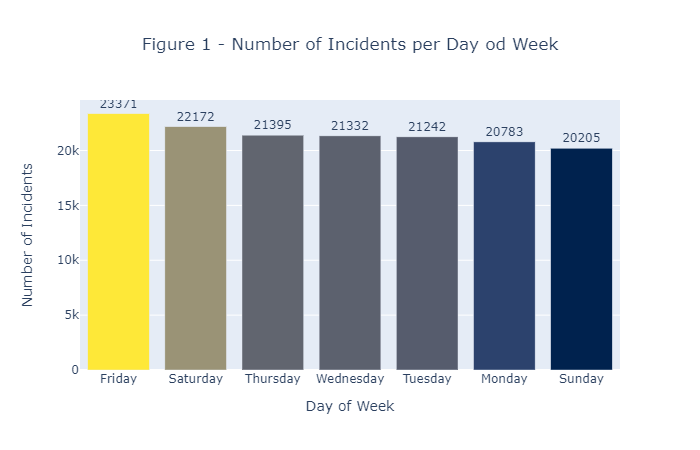

In [190]:
# Plotting Number of Incidents per Day od Week
value = incidents['DayOfWeek'].value_counts().round(0)
label = value.index
trace = go.Bar(y=value, 
               x=label,text = value,textposition= "outside",
               marker={'color': value,
                   'colorscale': 'Cividis'})
layout = go.Layout(title="Figure 1 - Number of Incidents per Day od Week", 
                   xaxis={'title' : "Day of Week"},
                  yaxis={'title' : "Number of Incidents"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

In [191]:
# Number of Incidents per Category
incidents['Category'].value_counts()

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

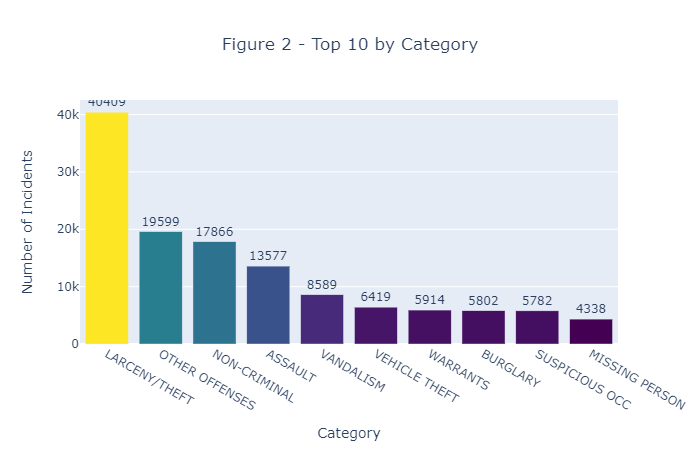

In [192]:
# Plotting Top 10 by Category
value = incidents['Category'].value_counts().round(0).nlargest(10)
label = value.index
trace = go.Bar(y=value, 
               x=label,text = value,textposition= "outside",
               marker={'color': value,
                   'colorscale': 'Viridis'})
layout = go.Layout(title="Figure 2 - Top 10 by Category ", 
                   xaxis={'title' : "Category"},
                  yaxis={'title' : "Number of Incidents"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

In [193]:
# Top 10 by Time
incidents['Time'].value_counts().nlargest(10)

12:00    3842
00:01    3397
18:00    3165
19:00    2912
20:00    2902
17:00    2830
21:00    2590
22:00    2479
16:00    2443
15:00    2406
Name: Time, dtype: int64

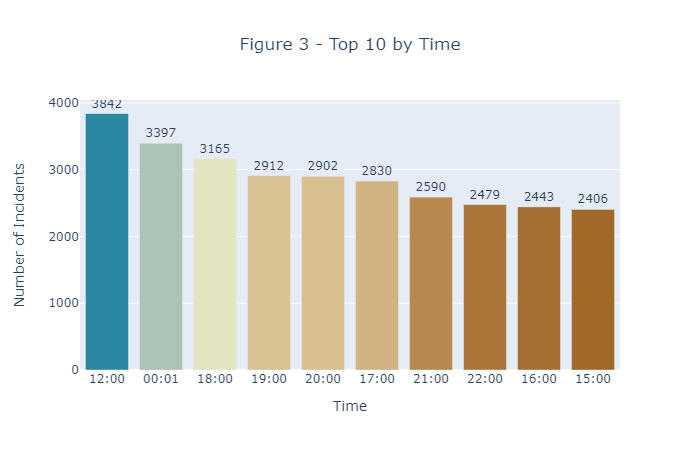

In [194]:
# Plotting Top 10 by Time 
value = incidents['Time'].value_counts().round(0).nlargest(10)
label = value.index
trace = go.Bar(y=value, 
               x=label,text = value,textposition= "outside",
               marker={'color': value,
                   'colorscale': 'Earth'})
layout = go.Layout(title="Figure 3 - Top 10 by Time ", 
                   xaxis={'title' : "Time"},
                  yaxis={'title' : "Number of Incidents"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

In [195]:
# Top 10 by Address
incidents['Address'].value_counts().nlargest(10)

800 Block of BRYANT ST          3561
800 Block of MARKET ST          1405
1000 Block of POTRERO AV         644
900 Block of MARKET ST           547
0 Block of UNITEDNATIONS PZ      452
500 Block of JOHNFKENNEDY DR     448
3200 Block of 20TH AV            431
600 Block of VALENCIA ST         399
100 Block of OFARRELL ST         389
1100 Block of FILLMORE ST        382
Name: Address, dtype: int64

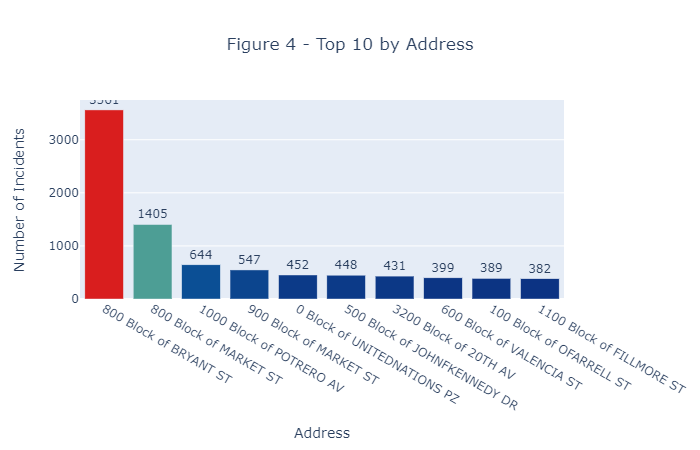

In [196]:
# Plotting Top 10 by Time 
value = incidents['Address'].value_counts().round(0).nlargest(10)
label = value.index
trace = go.Bar(y=value, 
               x=label,text = value,textposition= "outside",
               marker={'color': value,
                   'colorscale': 'Portland'})
layout = go.Layout(title="Figure 4 - Top 10 by Address", 
                   xaxis={'title' : "Address"},
                  yaxis={'title' : "Number of Incidents"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

# Introduction to Folium <a id="4"></a>

<img src='folium.png' />

Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

In [197]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [198]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# display the map of San Francisco
sanfran_map


html_string = sanfran_map.get_root (). render ()

### Now let's superimpose the locations of the crimes onto the map. The way to do that in Folium is to create a feature group with its own features and style and then add it to the sanfran_map.

In [199]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
incidents = incidents.iloc[0:limit, :]

In [200]:
# instantiate a feature group for the incidents in the dataframe
incidents_place = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(incidents.Y, incidents.X):
    incidents_place.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents_place)

### Adding a pop-up text that will be displayed when we hover over a marker.<br>
### Making each marker display the category of the crime when flown over.

In [201]:
# instantiate a feature group for the incidents in the dataframe
incidents_place = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(incidents.Y, incidents.X):
    incidents_place.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )


# add pop-up text to each marker on the map
latitudes = list(incidents.Y)
longitudes = list(incidents.X)
labels = list(incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)       

# add incidents to map
sanfran_map.add_child(incidents_place)

### Another visualization method is to group the markers in different clusters.<br>
### Each cluster is then represented by the number of crimes in each neighborhood.

In [202]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents_place = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(incidents.Y, incidents.X, incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents_place)

# display map
sanfran_map